In [2]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


ImportModules

In [ ]:
!pip install matplotlib
!pip install tqdm
!pip install tensorflow


In [3]:

import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
   
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, array_to_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.losses import BinaryCrossentropy

warnings.filterwarnings('ignore')

2024-11-20 10:33:08.755463: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-20 10:33:08.999448: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732120389.101715   55347 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732120389.136669   55347 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-20 10:33:09.356047: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

# Load Files

In [4]:
BASE_DIR = 'converted_imgs/'

In [5]:
image_paths = []
for image_name in os.listdir(BASE_DIR):
  image_path = os.path.join(BASE_DIR, image_name)
  image_paths.append(image_path)

In [6]:
len(image_paths)

11044

## Visualize Image Dataset

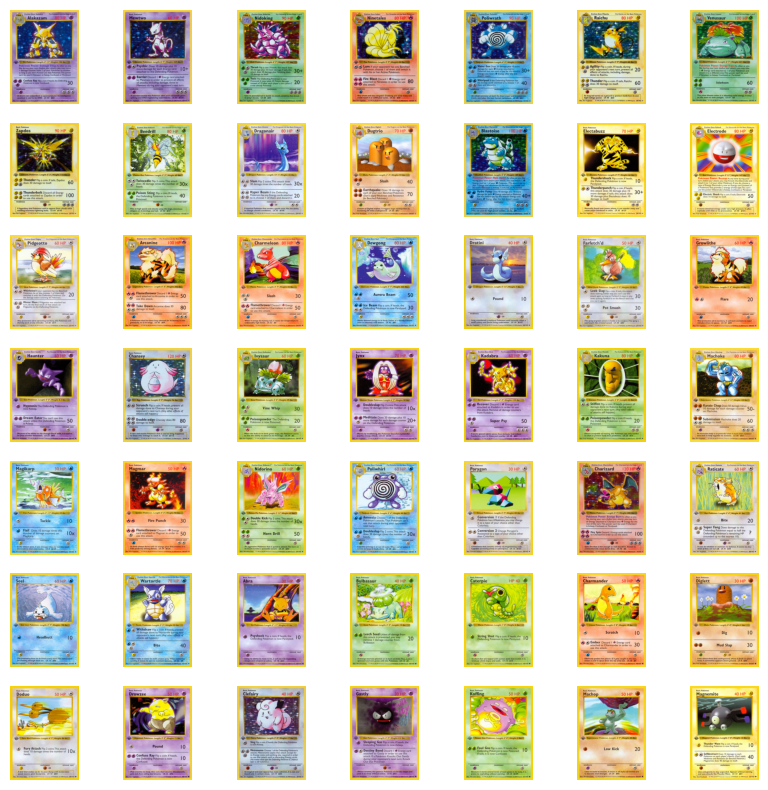

In [12]:
# display grid of images (7 x 7)
plt.figure(figsize=(10,10))
temp_images = image_paths[:49]
index = 1

for image_path in temp_images:
    plt.subplot(7,7,index)
    # load the image
    img = load_img(image_path)
    # convert to numpy array
    img = np.array(img)
    plt.imshow(img)
    plt.axis('off')
    
    index += 1

# Preprocess Images

In [ ]:
from PIL import Image
import os

for path in tqdm(image_paths):
    try:
        img = Image.open(path)  # attempt to open image
        img.verify()  # verify image is valid
    except Exception as e:
        print(f"Invalid image file: {path} - {e}")


100%|██████████| 11044/11044 [03:41<00:00, 49.85it/s]


In [ ]:
input_dir = "imgs/"
output_dir = "converted_imgs/"

os.makedirs(output_dir, exist_ok=True)

# target size and mode
target_size = (600, 825)  # width x height
target_mode = "RGB"

# itterate over images, convert images, save to new path
for image_path in os.listdir(input_dir):
    full_path = os.path.join(input_dir, image_path)

    try:
        img = Image.open(full_path)

        # convert to RGB if not already
        if img.mode != target_mode:
            img = img.convert(target_mode)

        # resize to target dims
        img = img.resize(target_size)

        # save the converted image to the output directory
        output_path = os.path.join(output_dir, image_path)
        img.save(output_path)

        print(f"Processed and saved: {output_path}")

    except Exception as e:
        print(f"Error processing {image_path}: {e}")


Processed and saved: converted_imgs/base1-1.png
Processed and saved: converted_imgs/base1-10.png
Processed and saved: converted_imgs/base1-11.png
Processed and saved: converted_imgs/base1-12.png
Processed and saved: converted_imgs/base1-13.png
Processed and saved: converted_imgs/base1-14.png
Processed and saved: converted_imgs/base1-15.png
Processed and saved: converted_imgs/base1-16.png
Processed and saved: converted_imgs/base1-17.png
Processed and saved: converted_imgs/base1-18.png
Processed and saved: converted_imgs/base1-19.png
Processed and saved: converted_imgs/base1-2.png
Processed and saved: converted_imgs/base1-20.png
Processed and saved: converted_imgs/base1-21.png
Processed and saved: converted_imgs/base1-22.png
Processed and saved: converted_imgs/base1-23.png
Processed and saved: converted_imgs/base1-24.png
Processed and saved: converted_imgs/base1-25.png
Processed and saved: converted_imgs/base1-26.png
Processed and saved: converted_imgs/base1-27.png
Processed and saved: c

In [5]:
batch_size = 1000  # Adjust batch size based on your system's memory
train_images = []

for i in range(0, len(image_paths), batch_size):
    batch_paths = image_paths[i:i+batch_size]
    batch_images = []
    for path in tqdm(batch_paths):
        try:
            img = load_img(path)
            img = np.array(img)
            batch_images.append(img)
        except Exception as e:
            print(f"Error loading image {path}: {e}")


100%|██████████| 44/44 [00:00<00:00, 49.80it/s]


# Make sure theyre all the same dim

In [ ]:

converted_imgs_dir = "converted_imgs"

all_same_dimensions = True
reference_size = None
invalid_files = []
count = 0

for image_path in os.listdir(converted_imgs_dir):
    full_path = os.path.join(converted_imgs_dir, image_path)
    count += 1
    print(count)
    try:
        img = Image.open(full_path)

        # if null or zero dimensions
        if img.size[0] == 0 or img.size[1] == 0:
            invalid_files.append((image_path, "Zero dimensions"))
            continue

        # reference size to compare to others (first img)
        if reference_size is None:
            reference_size = img.size

        # if dimensions match the reference size
        if img.size != reference_size:
            all_same_dimensions = False
            invalid_files.append((image_path, f"Invalid size: {img.size}"))

    except Exception as e:
        # Log files that cannot be opened or processed
        invalid_files.append((image_path, f"Error: {e}"))

# output results
if invalid_files:
    print("Issues found in the following files:")
    for file, issue in invalid_files:
        print(f"{file}: {issue}")
else:
    print("All files are valid with the same dimensions:", reference_size)

if all_same_dimensions:
    print("All images have the same dimensions.")
else:
    print("Not all images have the same dimensions.")


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
